# 1.Import Library


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# LOAD DATASET

In [35]:
pr = pd.read_csv('cancer.csv')
pr_0 = pr.drop('Unnamed: 32',axis=1)
print(pr_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# 3. EDA

In [36]:
#Find if there are any missing values present

print(pr_0.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Label Encoding on Diagnosis 

In [37]:
pr_1 = pd.get_dummies(pr_0,drop_first=True)
print(pr_1.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [38]:
# changing the type from uint8 to float
pr_1.diagnosis_M = pr_1.diagnosis_M.astype('float')
print(pr_1.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#  Standardize Data to avoid Skewness

In [39]:
from sklearn.preprocessing import StandardScaler

X_std = pr_1.drop(['diagnosis_M'],axis=1)
Y_std = pr_1.diagnosis_M

### (need to separate Dependent and independent variable to standardize data)

object = StandardScaler()
object.fit(X_std)
x = object.transform(X_std)
print(x)

[[-0.23640517  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [-0.23640344  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 0.43174109  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [-0.23572747  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [-0.23572517  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.24240586 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


# Feature Engineering

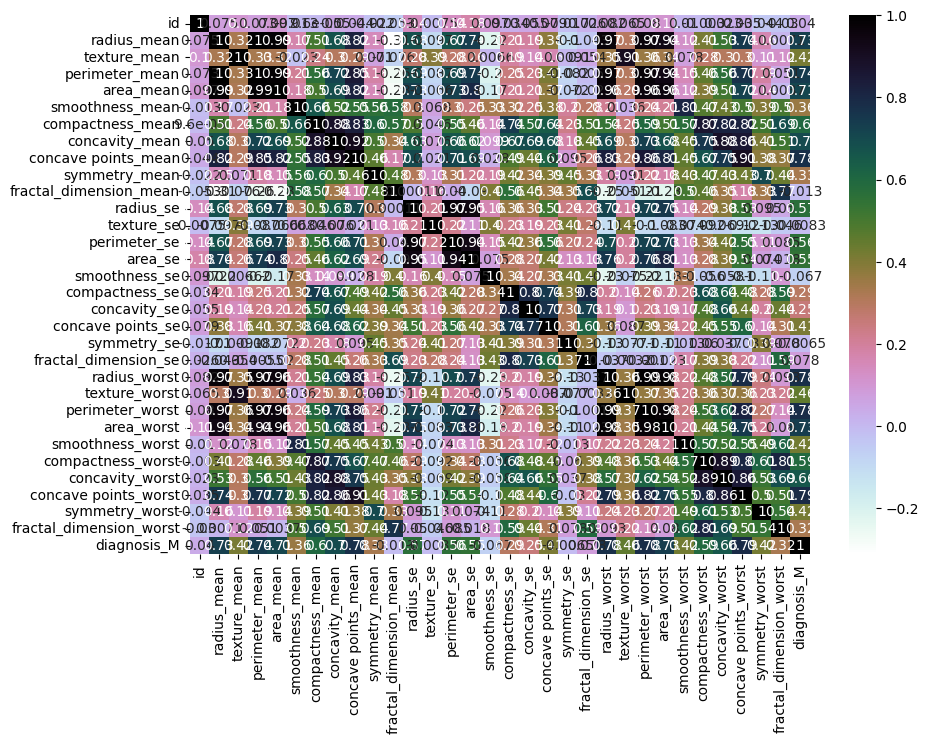

In [40]:
## Heatmap is used to visually represent the correlation.
plt.figure(figsize = (10,7))
sns.heatmap(pr_1.corr(),annot=True,cmap='cubehelix_r')
plt.show()   


# To find the correlation among the variables.

In [42]:
cor = pr_1.corr()
print(cor)  



                               id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.

# Feature Selection based on correlation with Target Variable

In [43]:
#Correlation with Target variable(Diagnosis_M)
cor_target = abs(cor["diagnosis_M"])

#Selecting highly correlated features with the Target Variable
relevant_features = cor_target[cor_target>0.6]
print(relevant_features)                   


radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
concavity_mean          0.696360
concave points_mean     0.776614
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
concavity_worst         0.659610
concave points_worst    0.793566
diagnosis_M             1.000000
Name: diagnosis_M, dtype: float64


# Training & Testing Data

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [45]:
##  Based on Correlated values, these features are selected.
x1 = X_std[['radius_mean','perimeter_mean', 'area_mean','concavity_mean','concave points_mean','perimeter_worst',
             'radius_worst','area_worst','concavity_worst','concave points_worst']]
y1 = Y_std

train_x,test_x,train_y,test_y = train_test_split(x1,y1,test_size = 0.3,random_state=42)
print(train_x.shape)
print(test_x.shape)

(398, 10)
(171, 10)


# 6. SVM CLASSIFIER

In [46]:
model = svm.SVC()
model.fit(train_x,train_y)
pred = model.predict(test_x)
print('Accuracy score: ',metrics.accuracy_score(pred, test_y))
print(classification_report(pred,test_y))
Con_mtx = metrics.confusion_matrix(pred, test_y)
print("confusion matrix\n",Con_mtx)

Accuracy score:  0.9415204678362573
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96       116
         1.0       0.86      0.98      0.92        55

    accuracy                           0.94       171
   macro avg       0.92      0.95      0.94       171
weighted avg       0.95      0.94      0.94       171

confusion matrix
 [[107   9]
 [  1  54]]


# HyperParameter Tuning

In [48]:
#### We can increase Accuracy of the model by Hyper Parameter Tuning

# Define the range of the parameters
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 

grid = GridSearchCV(svm.SVC(), param_grid,refit=True,verbose=3)   
grid.fit(train_x,train_y)

## Hyperparameter Tuning is done. The best Parameters are:
print("\n\nBest Parameters: ",grid.best_params_)




Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.620 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.662 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.696 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ..C=1000, gamma

In [49]:
### The SVM model after the Tuning:
print(grid.best_estimator_)    

SVC(C=1, gamma=0.0001)


In [50]:
### Seeing Accuracy after the Hyperparameter Tuning
Tune_pred = grid.predict(test_x)

print('Accuracy score: ',metrics.accuracy_score(Tune_pred, test_y))
print(classification_report(Tune_pred,test_y))
Con_mtx2 = metrics.confusion_matrix(Tune_pred, test_y)
print("confusion matrix\n",Con_mtx2)                           

### Accuracy is increased by Hyperparameter Tuning


Accuracy score:  0.9707602339181286
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       109
         1.0       0.95      0.97      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

confusion matrix
 [[106   3]
 [  2  60]]


In [51]:
### We are also checking other Performance Metrics like Precision, Sensitivity, Specificity & AUC ROC score

TP = Con_mtx2[0,0]   ## TRUE POSITIVE
FP = Con_mtx2[0,1]   ## FALSE POSITIVE 
FN = Con_mtx2[1,0]   ## FALSE NEGATIVE
TN = Con_mtx2[1,1]   ## TRUE NEGATIVE 
Accuracy =  (TP+TN)/(TP+FP+FN+TN)
precision = (TP)/(TP+FP)
print('Accuracy: ',Accuracy)
print('precision: ',precision)

## Sensitivity and Specificity
sensitivity = (TP)/(TP+FN)
specificity = (TN)/(TN+FP)
print('sensitivity: ',sensitivity)
print('specificity: ',specificity)
### AUC ROC SCORE
score = roc_auc_score(Tune_pred,test_y)
print('AUC ROC SCORE: ',score)                   


Accuracy:  0.9707602339181286
precision:  0.9724770642201835
sensitivity:  0.9814814814814815
specificity:  0.9523809523809523
AUC ROC SCORE:  0.9701094998520272


# Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

## Estimating the accuracy of rbf kernel SVM by computing the scores Five consecutive times

clf = svm.SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(clf, test_x,Tune_pred, cv=5)


In [53]:
print("Cross Validation scores: \n",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



Cross Validation scores: 
 [0.94285714 0.97058824 0.94117647 1.         0.88235294]
0.95 accuracy with a standard deviation of 0.04
